**UADFV**: 380 real and 380 fakes for training; 110 real and 100 fake for testing.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
seed = 2021
train_dir = 'UADFV/development/'
test_dir = 'UADFV/evaluation/'

In [21]:

def lapl(im):
    # [variables]
    ddepth = cv2.CV_16S
    kernel_size = 5

    # [load]
    src = cv2.imread(im, cv2.IMREAD_COLOR)

    # Check if image is loaded fine
    if src is None:
        print ('Error opening image')
        print ('Program Arguments: [image_name -- default lena.jpg]')
        return -1

    # [reduce_noise]
    src = cv2.GaussianBlur(src, (kernel_size, kernel_size), 0)

    # [convert_to_gray]
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    # [laplacian]
    dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)

    # [convert]
    abs_dst = cv2.convertScaleAbs(dst)
   
    # [display]
    plt.imshow(abs_dst)
    
    plt.show()

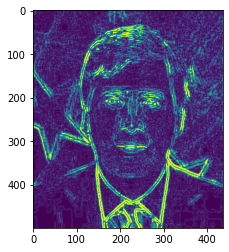

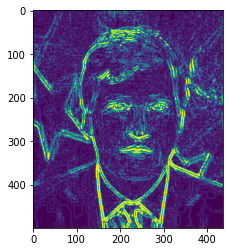

In [22]:
lapl(train_dir + "fake/0001_fake/fake.000312.jpg")
lapl(train_dir + "real/0001/000293.jpg")

In [24]:
"""Taken from https://github.com/fled/blur_detection"""
def get_blur_map(image_file, win_size=10, sv_num=3):
    img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    new_img = np.zeros((img.shape[0]+win_size*2, img.shape[1]+win_size*2))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            if i<win_size:
                p = win_size-i
            elif i>img.shape[0]+win_size-1:
                p = img.shape[0]*2-i
            else:
                p = i-win_size
            if j<win_size:
                q = win_size-j
            elif j>img.shape[1]+win_size-1:
                q = img.shape[1]*2-j
            else:
                q = j-win_size
            #print p,q, i, j
            new_img[i,j] = img[p,q]

    #cv2.imwrite('test.jpg', new_img)
    #cv2.imwrite('testin.jpg', img)
    blur_map = np.zeros((img.shape[0], img.shape[1]))
    max_sv = 0
    min_sv = 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            block = new_img[i:i+win_size*2, j:j+win_size*2]
            u, s, v = np.linalg.svd(block)
            top_sv = np.sum(s[0:sv_num])
            total_sv = np.sum(s)
            sv_degree = top_sv/total_sv
            if max_sv < sv_degree:
                max_sv = sv_degree
            if min_sv > sv_degree:
                min_sv = sv_degree
            blur_map[i, j] = sv_degree
    #cv2.imwrite('blurmap.jpg', (1 - blur_map) * 255)

    blur_map = (blur_map-min_sv)/(max_sv-min_sv)
    #cv2.imwrite('blurmap_norm.jpg', (1-blur_map)*255)
    return blur_map

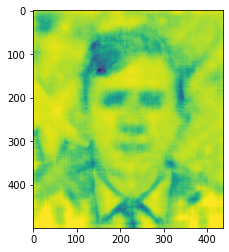

In [25]:
im1 = train_dir + "fake/0001_fake/fake.000312.jpg"
im2 = train_dir + "real/0001/000293.jpg"
blur_map = get_blur_map(im1)

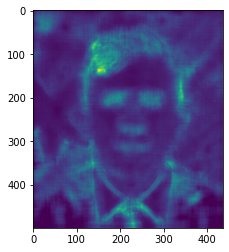

In [26]:
plt.imshow((1-blur_map)*255)

In [27]:
blur_map = get_blur_map(im2)

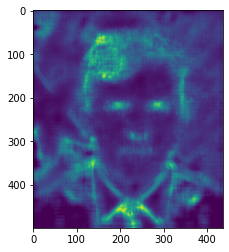

In [28]:
plt.imshow((1-blur_map)*255)

In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.1
)

train_generator = data_generator.flow_from_directory(
    directory=data_dir,
    class_mode='binary',
    color_mode="rgb",
    batch_size=760,
    shuffle=True,
    seed=seed,
    target_size=image_resize,
    subset="training"
)

val_generator = data_generator.flow_from_directory(
    directory=data_dir,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    target_size=image_resize,
    seed=seed,
    subset="validation"
)

test_generator = data_generator.flow_from_directory(
    directory=test_dir,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    target_size=image_resize,
    seed=seed,
)

Found 684 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Found 684 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Found 210 images belonging to 2 classes.
